In [1]:
%load_ext cython
import sys
sys.path[0] = '/home/bram/ANTS'

In [8]:
%matplotlib inline

In [3]:
%%cython -a
import numpy as np

from libc.stdlib cimport rand, RAND_MAX
cimport cython
@cython.cdivision(True)
cdef double randu():
    return rand() / (RAND_MAX + 1.0)

l = []
cdef long i,N=<long>1e6
for i in range(N):
    l.append(randu())
    
print(np.histogram(l, bins=10, range=[0,1], normed=False, weights=None, density=None))

(array([100017,  99912,  99720, 100145, 100198, 100247,  99943,  99656,
       100128, 100034]), array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]))


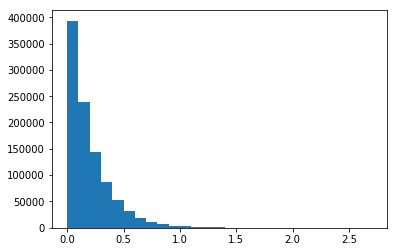

In [4]:
%%cython -a

cimport numpy as np
import numpy as np
cimport cython
from libc.stdlib cimport rand as crand, RAND_MAX
from libc.math cimport exp as cexp, log as cln

@cython.cdivision(True)
@cython.wraparound(False)
@cython.boundscheck(False)
@cython.nonecheck(False)
cdef class RNG():
    cdef:
        double t,beta
        
    cdef double rand(self):
        return crand() / (RAND_MAX + 1.0)
    
    def __cinit__(self,beta = 1):
        " inherrit the numpy random number generator "
        super().__init__()
        self.t = 0 #countdown timer
        self.beta = beta

    cdef void add_t(self,double dt):
        self.t-=dt
    
    cdef double exp_rand(self,double * gamma):
        return -1/gamma[0]*cln(1-self.rand())
    
cdef RNG R = RNG()
cdef double gamma  =5
l = []
cdef long i,N=<long>1e6
for i in range(N):
    l.append(R.exp_rand(&gamma))
    
# hist,bins = np.histogram(l, bins=100, range=[0,5], normed=False, weights=None, density=None)

import matplotlib.pyplot as plt
plt.hist(l, bins=np.arange(0,max(l),0.1))  # arguments are passed to np.histogram
plt.show()

#     cdef double exp_signed_rand(self):
#         if self.t <=0:
#             self.sign = self.rand()-0.5 # 1 or -1 (exceptionally rare: 0)
#             self.t = self.exponential(self.beta)
#         return self.sign*self.rand()


In [2]:
%%cython -a

import numpy as np
import sys
from cythonic.plugins.rng cimport RNG
cdef long i,N = <long>1e6
cdef double gamma = .5
cdef double[:,::] I = np.array(np.zeros((N,2))), J = np.array(np.zeros((N,2)))

# cimport cython
# from libc.stdlib cimport rand as crand, RAND_MAX
# from libc.math cimport exp as cexp, log as cln
# @cython.cdivision(True)
# @cython.wraparound(False)
# @cython.boundscheck(False)
# @cython.nonecheck(False)
# cdef class RNG():
#     cdef double t, beta, inv_rand_max
#     cdef double rand(self):
#         return crand() *self.inv_rand_max

#     def __cinit__(self,double gamma = 1):
#         self.t = 0 #countdown timer
#         self.beta = 1/gamma
#         self.inv_rand_max = 1/(RAND_MAX+1)

#     cdef readonly void add_t(self,double dt):
#         self.t-=dt

#     cdef readonly double exp_rand(self):
#         " beta = 1/gamma --> CDF^-1 := -1/gamma*log(1-X)"
#         return -self.beta*cln(1-self.rand())



import time
cdef double tic, toc, t1, t2

cdef RNG R = RNG(gamma)
tic = time.time()
for i in range(N):
    I[i,0] = R.exp_rand()
    I[i,1] = R.rand()
toc = time.time()
t1 = toc-tic
print(f"Winnen!: Avg {1000*t1/N} msec for C")

tic = time.time()
for i in range(N):
    J[i,0] = np.random.exponential(1/gamma)
    J[i,1] = np.random.rand()
toc = time.time()
t2 = toc -tic
print(f"Avg {1000*t2/N} msec for numpy")
print(f"C is {t2/t1} times faster than numpy ")

import matplotlib.pyplot as plt
plt.hist(I[:,1], bins=np.arange(0,max(I[:,1]),0.1))  # arguments are passed to np.histogram
plt.show()


ValueError: cythonic.plugins.rng.RNG has the wrong size, try recompiling. Expected 40, got 48

Winnen!: Avg 5.0368547439575194e-05 msec for C
Avg 0.0027235209941864013 msec for numpy
C is 54.07185898012411 times faster than numpy 


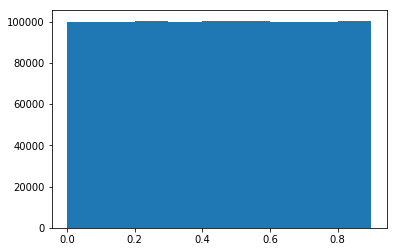

largest random value == 0.999996563885361


In [11]:
%%cython -a

import numpy as np
import sys
from cythonic.plugins.rng cimport RNG
cdef long i,N = <long>1e6
cdef double gamma = .5
cdef double[:,::] I = np.array(np.zeros((N,2))), J = np.array(np.zeros((N,2)))


import time
cdef double tic, toc, t1, t2

cdef RNG R = RNG(gamma)
tic = time.time()
for i in range(N):
    I[i,0] = R.exp_rand()
    I[i,1] = R.rand()
toc = time.time()
t1 = toc-tic
print(f"Winnen!: Avg {1000*t1/N} msec for C")

tic = time.time()
for i in range(N):
    J[i,0] = np.random.exponential(1/gamma)
    J[i,1] = np.random.rand()
toc = time.time()
t2 = toc -tic
print(f"Avg {1000*t2/N} msec for numpy")
print(f"C is {t2/t1} times faster than numpy ")

import matplotlib.pyplot as plt
plt.hist(I[:,1], bins=np.arange(0,max(I[:,1]),0.1))  # arguments are passed to np.histogram
plt.show()

print(f'largest random value == {max(I[:,1])}')